In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
#reading information from train.cv
PATH= '/Users/rituka/Downloads/WindEnergyForecasting-Assignment2/'
file_name= 'TrainData.csv' 
train_data = pd.read_csv(PATH + file_name)

In [4]:
#computing wind direction based on 'U10' and 'V10'
import math
def compute_dir(x):
    #conversion factor (radians to degrees)
    r2d= 45.0/math.atan(1.0)
    
    return math.atan2(x['U10'],x['V10'])* r2d +180
        

In [5]:
#computing wind direction for all records
train_data['WindDirection'] = train_data.apply(compute_dir, axis=1)

In [7]:
train_data.head()

,TIMESTAMP,POWER,U10,V10,WS10,U100,V100,WS100,WindDirection
16075,20131031 20:00,0.101254,-1.459917,-1.778960,2.301316,-1.974368,-4.936280,5.316483,39.374268
16076,20131031 21:00,0.105047,-1.293326,-2.350447,2.682777,-0.781394,-4.903565,4.965433,28.821639
16077,20131031 22:00,0.145079,-0.308284,-2.441885,2.461269,0.257905,-4.027432,4.035681,7.195432
16078,20131031 23:00,0.180933,1.148765,-2.789011,3.016330,1.628004,-3.520358,3.878572,337.613739
16079,20131101 0:00,0.236826,2.879322,-2.077827,3.550755,3.667186,-2.551704,4.467600,305.815629


In [8]:
#Assignment 2, Part 2
train_data_2= train_data[['WindDirection','WS10', 'POWER']]

In [9]:
train_data_2.head()

,WindDirection,WS10,POWER
0,351.685865,3.699120,0.273678
1,352.953843,2.696797,0.086796
2,1.858464,2.030140,0.006811
3,13.126830,1.847362,0.018646
4,24.414950,1.824698,0.034812


In [11]:
test_name='WeatherForecastInput.csv'
test_data_weather = pd.read_csv(PATH + test_name)

In [13]:
#computing wind direction for test set as well
test_data_weather['WindDirection'] = test_data_weather.apply(compute_dir, axis=1)

In [14]:
#choosing required columns for test data
test_data_wind=test_data_weather[['WindDirection','WS10','TIMESTAMP']]


In [15]:
test_name_power='Solution.csv'
test_data_power=pd.read_csv(PATH + test_name_power)
test_data_2= pd.merge(test_data_wind,test_data_power, on='TIMESTAMP')

In [17]:
#we do not need timestamp anymore
test_data_2.drop(['TIMESTAMP'], axis=1, inplace=True)

In [18]:
test_data_2.head()

,WindDirection,WS10,POWER
0,287.118846,3.622753,0.167215
1,275.284318,3.666925,0.063998
2,264.875184,3.672510,0.039035
3,258.302331,3.627028,0.036232
4,253.671719,3.737673,0.064888


In [19]:
train_data_2.head()

,WindDirection,WS10,POWER
0,351.685865,3.699120,0.273678
1,352.953843,2.696797,0.086796
2,1.858464,2.030140,0.006811
3,13.126830,1.847362,0.018646
4,24.414950,1.824698,0.034812


In [20]:
#data for multiple linear regression
##Specifying the first and second second columns (wind direction and wind speed) as the feature set(X) and last column 
#(power generation) as the target(y ) for both train and test sets


X_train=train_data_2.values[:,0:-1]
y_train=train_data_2.values[:,-1]

X_test=test_data_2.values[:,0:-1]
y_test=test_data_2.values[:,-1]

In [22]:
#multiple linear regression
MLR_model=LinearRegression()
MLR_model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
#test the model
predictions_multiple_linear= MLR_model.predict(X_test)

In [26]:
#Calculating RMSE
def print_scores(y_test,y_pred, model):
    rmse= np.sqrt(mean_squared_error(y_test,y_pred))    
    print(" Root Mean squared error for %s is %.4f"% (model,rmse))
    return rmse

In [27]:
rmse_MLR=print_scores(y_test,predictions_multiple_linear, 'Multiple Linear Regression')

 Root Mean squared error for Multiple Linear Regression is 0.2149


In [28]:
#Calculating Mean average percentage error
MAPE_MLR=mean_absolute_error(y_test, predictions_multiple_linear)*100

In [29]:
MAPE_MLR

17.941362639788533

In [ ]:
fig= plt.figure(figsize=(15,8))
power_changes=fig.add_subplot(1,1,1)
power_changes.set_ylabel('Generated power')
power_changes.set_xlabel('Hours')

power_changes.plot(y_test, color='blue', label='Real power')
power_changes.plot(predictions_multiple_linear, color= 'red', label='Predictions')
power_changes.set_title('Real wind power generation versus predictions by Multiple Linear Regression')
power_changes.legend(loc='best')

In [30]:
#data for  linear regression(one feature=wind speed)

X_train=train_data_2.values[:,1:-1]
y_train=train_data_2.values[:,-1]

X_test=test_data_2.values[:,1:-1]
y_test=test_data_2.values[:,-1]

In [31]:

X_train=X_train.reshape(-1,1)

X_test= X_test.reshape(-1,1)

from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
predictions_linear= LR_model.predict(X_test)

In [33]:
rmse_MLR=print_scores(y_test,predictions_linear, 'Linear Regression')

 Root Mean squared error for Linear Regression is 0.2164


In [34]:

MAPE_LR=mean_absolute_error(y_test, predictions_linear)*100


In [35]:
MAPE_LR

18.0478427662073

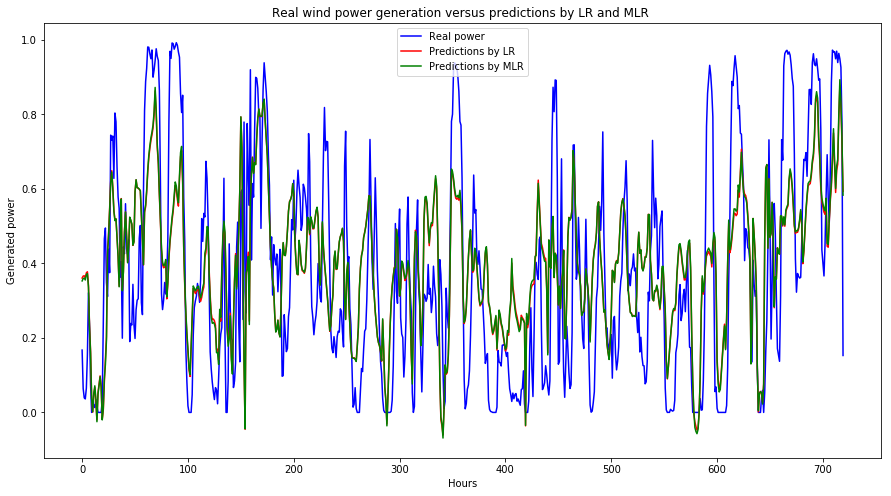

In [46]:
fig= plt.figure(figsize=(15,8))
power_changes=fig.add_subplot(1,1,1)
power_changes.set_ylabel('Generated power')
power_changes.set_xlabel('Hours')

power_changes.plot(y_test, color='blue', label='Real power')


power_changes.plot(predictions_linear, color= 'red', label='Predictions by LR')
power_changes.plot(predictions_multiple_linear, color= 'green', label='Predictions by MLR')


power_changes.set_title('Real wind power generation versus predictions by LR and MLR ')
power_changes.legend(loc='best')

In [43]:
PATH= '/Users/rituka/Downloads/WindEnergyForecasting-Assignment2/'
file_name= 'ForecastTemplate.csv' 
tempelate_result2 = pd.read_csv(PATH + file_name)

In [44]:
def create_results(temp,pred):
    
    temp['FORECAST']=pred
    return temp

In [45]:
Forecast_MLR=create_results(tempelate_result2,predictions_multiple_linear)
Forecast_MLR.to_csv('/Users/rituka/Documents/results/ForecastTemplate2-MLR.csv',index=False)